# Neon Sites Evaluation -- CLM simulation vs. Observation Time-Series

Negin Sobhani, National Center for Atmospheric Research, email: negins@ucar.edu

Danica Lombardozzi, National Center for Atmospheric Research, email: dll@ucar.edu

Will Wieder, National Center for Atmospheric Research, email: wwieder@ucar.edu

Gordon Bonan, National Center for Atmospheric Research, email: bonan@ucar.edu

David Lawrence,  National Center for Atmospheric Research, email: dlawren@ucar.edu

#**** Other names

------------------------------------------------------------------------------

The goal of this notebook is to provide some example visualizations of CTSM simulations vs. Neon observation.

You will use Neon observations at different sites to evaluate the performance of CTSM simulations. 

In this tutorial, you will learn the following skills:

* How to download neon data
* How to load neon data and quickly inspect the data
* How to load CTSM model output

#************ TODO: correct this....

## Installation Instructions:
    
    
This tutorial requires the following Python libraries:


For running these on your local machine, we recommend the Mincoda package manager. 

To intstall the necessary libraries, please use the following commands:
 
```
conda create --name neon -c conda-forge python=3.9 numpy scipy matplotlib pandas netcdf4 jupyter xarray tqdm bokeh jupyterlab dask
```
    

What plots to make in this tutorial:
    
    * Time-Series
    * Scatter-Plot
    * Statistics Summary

First, import the required libraries:

In [1]:
## TODO: clean up imports
#Import Libraries
%matplotlib inline

import os
import sys
import glob
import argparse
import requests
import time

import numpy as np
import pandas as pd
import xarray as xr

#import plotly.graph_objects as go

from os.path import join, expanduser
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

Identify the year and sites of interest

In [2]:
year = "2018"
neon_site = "HARV"
neon_sites = ["NIWO","ABBY", "HARV"]

-----------
## Step1) Data Pre-processing:

### 1-1) Load Neon Observation:

In this tutorial, we assume you have downloaded neon data for the sites of interest. 

TODO: Instructions on how to download from neon. 

Here, Please change `obs_path` to point to where you have stored Neon data:

* List all observation files for the period of interest:

In [3]:
obs_path = os.path.join('/Users/negins/work/neon/neon_surf_data',neon_site)
obs_files = sorted(glob(join(obs_path,year+"*.nc")))

print("All Observation files:")
print(*obs_files,sep='\n')

All Observation files:
/Users/negins/work/neon/neon_surf_data/HARV/2018-01.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-02.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-03.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-04.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-05.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-06.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-07.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-08.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-09.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-10.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-11.nc
/Users/negins/work/neon/neon_surf_data/HARV/2018-12.nc


Read all the observation files for the period of interest:

In [4]:
start = time.time()

ds_obs = xr.open_mfdataset(obs_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all observation files took:", end-start, "s.")

Reading all observation files took: 0.2692139148712158 s.


In [31]:
#TODO: remove for tutorial. 
#ds_obs['year']  = ds_obs ['time.year']
#ds_obs['month'] = ds_obs ['time.month']
#ds_obs['day']  = ds_obs ['time.day']
#ds_obs['hour'] = ds_obs ['time.hour']

#ds_obs['season'] = ds_obs ['time.season']

# making these because xarray resample takes forever...
# Note to self: Instead I decided to go with  Pandas.

In [6]:
#TODO remove for tutorial. 

#-- find out what variables are available in obs files
invalid_vars = ['time','lat', 'LATIXY','lon','LONGXY']

valid_vars = []

for var in ds_obs.variables:
    if var not in invalid_vars: 
        valid_vars.append(var)

print (valid_vars)

['FLDS', 'FSDS', 'PRECTmms', 'RH', 'PSRF', 'TBOT', 'WIND', 'ZBOT', 'FLDS_fqc', 'FSDS_fqc', 'PRECTmms_fqc', 'RH_fqc', 'PSRF_fqc', 'TBOT_fqc', 'WIND_fqc', 'year', 'month', 'day', 'hour', 'season']


Choose the variables, you'd like to extract from observation files:

In [33]:
#what we want from these files not all the above...
valid_vars = ['TBOT','FLDS','FSDS']

In [34]:
# convert to Pandas DataFrame for easier handling:
df_obs = pd.DataFrame({'time':ds_obs.time})

for var in valid_vars:
    field = np.ravel ( ds_obs[var])     
    df_obs[var]=field
    
#df_obs['year'] = df_obs['time'].dt.year
#df_obs['month'] = df_obs['time'].dt.month
#df_obs['day'] = df_obs['time'].dt.day
#df_obs['hour'] = df_obs['time'].dt.hour

print (df_obs.head())

                 time      TBOT   FLDS  FSDS
0 2018-01-01 00:00:00  254.9643  150.2   0.0
1 2018-01-01 00:30:00  254.7585  149.5   0.0
2 2018-01-01 01:00:00  254.6734  149.1   0.0
3 2018-01-01 01:30:00  254.4226  148.5   0.0
4 2018-01-01 02:00:00  254.2015  148.3   0.0


### 1-2) Load Eval files

Similar to the step above, load the eval files. 
#TODO: instructions on how to download the eval files


Change eval_path to point to your local directory where you've stored evaluation files

In [35]:
eval_path = os.path.join('/Users/negins/work/neon/neon_eval_data',neon_site)
eval_files = sorted(glob(join(eval_path,year+"*.nc")))

print("All Observation files:")
print(*eval_files,sep='\n')

All Observation files:
/Users/negins/work/neon/neon_eval_data/HARV/2018-01.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-02.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-03.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-04.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-05.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-06.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-07.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-08.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-09.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-10.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-11.nc
/Users/negins/work/neon/neon_eval_data/HARV/2018-12.nc


In [10]:
%%time
start = time.time()

ds_eval = xr.open_mfdataset(eval_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all observation files took:", end-start, "s.")

Reading all observation files took: 0.25319719314575195 s.
CPU times: user 242 ms, sys: 6.26 ms, total: 248 ms
Wall time: 253 ms


In [11]:
#TODO: remove for tutorial. 

#ds_eval['year']  = ds_eval ['time.year']
#ds_eval['month'] = ds_eval ['time.month']
#ds_eval['day']  = ds_eval ['time.day']
#ds_eval['hour'] = ds_eval ['time.hour']

#ds_eval['season'] = ds_eval ['time.season']

In [36]:
#-- find out what variables are available in eval files
invalid_vars = ['time','lat', 'LATIXY','lon','LONGXY']

valid_vars = []

for var in ds_eval.variables:
    if var not in invalid_vars: 
        valid_vars.append(var)

print (valid_vars)

['NEE', 'FSH', 'EFLX_LH_TOT', 'GPP', 'Rnet', 'ZBOT', 'NEE_fqc', 'FSH_fqc', 'EFLX_LH_TOT_fqc', 'GPP_fqc', 'Rnet_fqc', 'year', 'month', 'day', 'hour', 'season']


In [37]:
#what we want from these files Not all the above...
valid_vars = ['NEE','FSH','EFLX_LH_TOT','GPP']

In [38]:
df_eval = pd.DataFrame({'time':ds_eval.time})

for var in valid_vars:
    field = np.ravel ( ds_eval[var])     
    df_eval[var]=field
    
#df_eval['year'] = df_eval['time'].dt.year
#df_eval['month'] = df_eval['time'].dt.month
#df_eval['day'] = df_eval['time'].dt.day
#df_eval['hour'] = df_eval['time'].dt.hour

#print (df_eval.head())

### 1-3) Load CLM simulation files:

Similar to the above steps, load the simulation files. 
#TODO: instructions on how to download the clm files


Change sim_path to point to your local directory where you've stored simulation (CLM) files


In [15]:
sim_path = "/Users/negins/work/neon/ctsm_sanjiv_sims/archive/hist/"
year = "2018"
sim_files = sorted(glob(join(sim_path,"NEON_HARV_test_0720.clm2.h0."+year+"*.nc")))

print("All Simulation files: [", len(sim_files), "files]")
#print(*sim_files,sep='\n')

All Simulation files: [ 365 files]


In [16]:
#sim_files_tmp =sim_files[0:10]

start = time.time()

ds_ctsm = xr.open_mfdataset(sim_files, decode_times=True, combine='by_coords',parallel=True)

end = time.time()
print("Reading all simulation files took:", end-start, "s.")


Reading all simulation files took: 1762.1094279289246 s.


In [17]:
ds_ctsm.time

<xarray.DataArray 'time' (time: 8760)>
array([cftime.DatetimeNoLeap(2018, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2018, 1, 1, 1, 0, 0, 107, has_year_zero=True),
       cftime.DatetimeNoLeap(2018, 1, 1, 2, 0, 0, 215, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2018, 12, 31, 21, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2018, 12, 31, 21, 59, 59, 121094, has_year_zero=True),
       cftime.DatetimeNoLeap(2018, 12, 31, 23, 0, 0, 878906, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2018-01-01 00:00:00 ... 2018-12-31 23:00:00.878906
Attributes:
    long_name:  time
    bounds:     time_bounds

In [18]:
#-- find out what variables are available in obs files
invalid_vars = ['time','lat', 'LATIXY','lon','LONGXY']

valid_vars = []

for var in ds_ctsm.variables:
    if var not in invalid_vars: 
        valid_vars.append(var)

print (valid_vars)

['levgrnd', 'levsoi', 'levlak', 'levdcmp', 'mcdate', 'mcsec', 'mdcur', 'mscur', 'nstep', 'time_bounds', 'date_written', 'time_written', 'area', 'landfrac', 'landmask', 'pftmask', 'nbedrock', 'ZSOI', 'DZSOI', 'WATSAT', 'SUCSAT', 'BSW', 'HKSAT', 'ZLAKE', 'DZLAKE', 'ACTUAL_IMMOB', 'AGNPP', 'ALT', 'ALTMAX', 'AR', 'ATM_TOPO', 'BAF_CROP', 'BAF_PEATF', 'BCDEP', 'BGNPP', 'BTRAN2', 'BTRANMN', 'CH4PROD', 'CH4_SURF_AERE_SAT', 'CH4_SURF_AERE_UNSAT', 'CH4_SURF_DIFF_SAT', 'CH4_SURF_DIFF_UNSAT', 'CH4_SURF_EBUL_SAT', 'CH4_SURF_EBUL_UNSAT', 'COL_FIRE_CLOSS', 'COL_FIRE_NLOSS', 'CONC_O2_SAT', 'CONC_O2_UNSAT', 'COST_NACTIVE', 'COST_NFIX', 'COST_NRETRANS', 'CPOOL', 'CROPPROD1C', 'CROPPROD1C_LOSS', 'CROPPROD1N', 'CROPPROD1N_LOSS', 'CWDC', 'CWDC_LOSS', 'CWDC_vr', 'CWDN', 'CWDN_vr', 'DEADCROOTC', 'DEADCROOTN', 'DEADSTEMC', 'DEADSTEMN', 'DENIT', 'DHSDT_CANOPY', 'DISPVEGC', 'DISPVEGN', 'DSL', 'DSTDEP', 'DSTFLXT', 'DWT_CONV_CFLUX', 'DWT_CONV_CFLUX_DRIBBLED', 'DWT_CONV_NFLUX', 'DWT_CROPPROD1C_GAIN', 'DWT_CROPPROD

In [42]:
#what we want from these files Not all the above...
plot_vars = ['TBOT','FLDS','FSDS','NEE','FSH','EFLX_LH_TOT','GPP']
for var in plot_vars:
    if var not in valid_vars:
        print ("Oops..", var)
#plot_vars = ['TBOT','FSH','GPP']
valid_vars = plot_vars


Oops.. TBOT
Oops.. FLDS
Oops.. FSDS


In [20]:
print (ds_ctsm.time.size)
print( var)
ds_ctsm[var].size
print (ds_ctsm[var])

8760
GPP
<xarray.DataArray 'GPP' (time: 8760, lndgrid: 1)>
dask.array<where, shape=(8760, 1), dtype=float32, chunksize=(48, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-01 00:00:00 ... 2018-12-31 23:00:00.878906
Dimensions without coordinates: lndgrid
Attributes:
    long_name:      gross primary production
    units:          gC/m^2/s
    cell_methods:   time: mean
    landunit_mask:  unknown


In [22]:
df_ctsm = pd.DataFrame({'time':ds_ctsm.time})

for var in plot_vars:
    field = np.ravel ( ds_ctsm[var])     
    df_ctsm[var]=field


In [173]:
df_all_obs = pd.merge(df_obs, df_eval, on="time")
df_all_obs['year'] = df_all_obs['time'].dt.year
df_all_obs['month'] = df_all_obs['time'].dt.month
df_all_obs['day'] = df_all_obs['time'].dt.day
df_all_obs['hour'] = df_all_obs['time'].dt.hour

print (df_all_obs.head())

#-- get hourly data for merging in the simulation:
df_all=df_all_obs.groupby(['year','month','day','hour']).mean()

#-- add simulation data to it:
for var in valid_vars:
    print (var)
    sim_var_name = "sim_"+var
    print (sim_var_name)
    #print (df_ctsm[var])
    df_all[sim_var_name]=df_ctsm[var].shift(-1).values

#save the data so we can load it for easier use later
df_all.to_pickle('./df_all.pkl')

                 time      TBOT   FLDS  FSDS       NEE        FSH  \
0 2018-01-01 00:00:00  254.9643  150.2   0.0  0.362771 -29.989264   
1 2018-01-01 00:30:00  254.7585  149.5   0.0  0.362771 -29.989264   
2 2018-01-01 01:00:00  254.6734  149.1   0.0  0.362771 -29.989264   
3 2018-01-01 01:30:00  254.4226  148.5   0.0  0.369871 -30.397387   
4 2018-01-01 02:00:00  254.2015  148.3   0.0  0.447568 -31.040477   

   EFLX_LH_TOT  GPP  year  month  day  hour  
0     1.168643  NaN  2018      1    1     0  
1     1.168643  NaN  2018      1    1     0  
2     1.168643  NaN  2018      1    1     1  
3     1.223718  NaN  2018      1    1     1  
4     1.197359  NaN  2018      1    1     2  
TBOT
sim_TBOT
FLDS
sim_FLDS
FSDS
sim_FSDS
NEE
sim_NEE
FSH
sim_FSH
EFLX_LH_TOT
sim_EFLX_LH_TOT
GPP
sim_GPP


<AxesSubplot:>

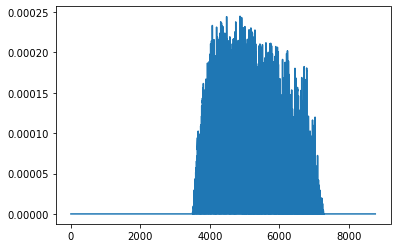

In [115]:
df_ctsm['GPP'].plot()

In [25]:
freq_list = ['all','hourly','daily','monthly']


In [227]:
%%time
#monthly_mean = ds_obs.resample(time='M').mean()

CPU times: user 717 ms, sys: 8.39 ms, total: 725 ms
Wall time: 731 ms


In [155]:
%%time
#weekly_mean = ds_obs.resample(time='W').mean()

CPU times: user 1.4 s, sys: 4.91 ms, total: 1.4 s
Wall time: 1.41 s


In [144]:
%%time
#daily_mean = ds_obs.resample(time='D').mean()

CPU times: user 10.4 s, sys: 33.6 ms, total: 10.5 s
Wall time: 10.5 s


In [151]:
%%time
#hourly_mean = ds_obs.resample(time='H').mean()


CPU times: user 4min 13s, sys: 1.49 s, total: 4min 15s
Wall time: 4min 16s


In [116]:
%%time
#df_hourly = df_obs.groupby(['year','month','day','hour']).mean()
#df_daily = df_obs.groupby(['year','month','day']).mean()
#df_monthly = df_obs.groupby(['year','month']).mean()



CPU times: user 12.9 ms, sys: 10.4 ms, total: 23.3 ms
Wall time: 33.6 ms


In [164]:
def get_data (df, var, freq):
    #var_name = var
    sim_var_name = "sim_"+var
    #print (var)
    #print (sim_var_name)
    if freq=="monthly":
        df = df.groupby(['year','month']).mean().reset_index()
        df["day"]=15
        df['time']=pd.to_datetime(df[["year", "month","day"]])

    elif freq=="daily":
        df = df.groupby(['year','month','day']).mean().reset_index()
        df['time']=pd.to_datetime(df[["year", "month", "day"]])

    elif freq=="hourly" or freq=="all":
        df = df.groupby(['year','month','day','hour']).mean().reset_index()
        df['time']=pd.to_datetime(df[["year", "month", "day","hour"]])
    
    
    df_new = pd.DataFrame({'time':df['time'],'NEON':df[var],'CLM':df[sim_var_name]})
    #print(df_new)
    return df_new

def find_regline(df, var, sim_var_name):
        # find the trendline:
        #sim_var_name = "sim_"+var
        #print (var)
        #print (sim_var_name)

        df_temp = df[[var, sim_var_name]]#.dropna()
        
        #df_temp = pd.DataFrame(df, columns)
        df_temp.dropna(inplace=True)
        #print (df_temp)

        #z = np.polyfit(df_temp[var], df_temp[sim_var_name], 1)
        #p = np.poly1d(z)
        
        #-----
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_temp[var], df_temp[sim_var_name])
        return slope, intercept, r_value, p_value, std_err
    

## Step2) Visualization

Here, we create the Bokeh application and run it on the jupyter notebook:

In [58]:
#time-series with Dropdown menu for values
from scipy import stats

import yaml
from bokeh.themes import Theme
from bokeh.models import ColumnDataSource, Slider , Dropdown, Select, PreText, Label, Slope
from bokeh.layouts import row,column
# make a simple plot time-series

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

## 1) Time-Series DashBoard

In [59]:
def simple_tseries(doc):
    
    df_new = get_data(df_all, 'TBOT','hourly')
    
    source = ColumnDataSource(df_new)

    #-- what are tools options
    tools = "hover, box_zoom, undo, crosshair"

    p = figure(tools=tools, x_axis_type="datetime", title= "Neon Time-Series "+neon_site)

    
    p.line('time', 'NEON', source=source, alpha=0.8, line_width=4, color="navy", legend_label="NEON")
    p.line('time', 'CLM',source=source , alpha=0.8, line_width=3, color="red", legend_label="CLM")
    #p.circle('time', 'var', source=source, alpha=0.8, color="navy")

    p.xaxis.major_label_text_color = 'dimgray'
    p.xaxis.major_label_text_font_size = '15px'
    p.yaxis.major_label_text_color = 'dimgray'
    p.yaxis.major_label_text_font_size = '15px'
    
    p.xaxis.axis_label_text_font_size = "15pt"
    p.axis.axis_label_text_font_style = "bold"
    p.grid.grid_line_alpha = 0.5
    p.title.text_font_size = '15pt'
    p.xaxis.axis_label = 'Time'


    
    def scatter_plot(q):
        q.circle('NEON', 'CLM', source=source, alpha=0.8, color="navy",fill_alpha=0.2, size=10)

        q.xaxis.major_label_text_color = 'dimgray'
        q.xaxis.major_label_text_font_size = '15px'
        q.yaxis.major_label_text_color = 'dimgray'
        q.yaxis.major_label_text_font_size = '15px'
    
        q.xaxis.axis_label_text_font_size = "13pt"
        q.yaxis.axis_label_text_font_size = "13pt"

        q.axis.axis_label_text_font_style = "bold"
        q.grid.grid_line_alpha = 0.5
        q.title.text_font_size = '15pt'
        q.xaxis.axis_label = 'NEON'
        q.yaxis.axis_label = 'CLM'

        
        #x = range(0,500)
        #y = range(0,500)

        #q.line(x, y,alpha=0.8, line_width=4, color="gray")
        
    
    q_width = 350
    q_height = 350
    q = figure(tools=tools,width=350, height=350)
    scatter_plot(q)
    
    p.add_tools(
        HoverTool(
            tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]
        )
    )
    
    stats = PreText(text='', width=500)

    
    menu = Select(options=plot_vars,value='TBOT', title='Variable') 
    
    def update_variable (attr, old, new):
        
        #print (menu.value)
        #print (menu_freq.value)
        df_new = get_data(df_all, menu.value, menu_freq.value)

        #slope, intercept, r_value, p_value, std_err = find_regline(df_new, 'NEON','CLM')
        #print (r_value)
        #slope_label = "y="+"{:.2f}".format(slope)+"+"+"{:.2f}".format(intercept)+"x"+" (R2="+"{:.2f}".format(r_value)+")"
        #mytext = Label(text=slope_label , x=0+20, y=q_height-100, 
        #       x_units="screen", y_units='screen', text_align="left")
        
        #regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

        #print(slope_label)
        #q.add_layout(mytext)
        #q.add_layout(regression_line)
        
        
        source.data =df_new
        #source.stream(df_new)


    def update_site (attr, old, new):
        p.title.text = "Neon Time-Series " +menu_site.value

    menu.on_change('value', update_variable)


    menu_freq = Select(options=freq_list,value='all', title='Frequency') 

    menu_freq.on_change('value', update_variable)


    menu_site = Select(options=neon_sites,value='HARV', title='Neon Site') 
    menu_site.on_change('value', update_site)

    
    #layout = row(column(menu, menu_freq, menu_site, q),  p)
    layout = row(p, column( menu, menu_freq, menu_site, q))
    doc.add_root(layout)
    
    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#FFFFFF"
                outline_line_color: white
                toolbar_location: above
                height: 550
                width: 1300
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: gray
    """, Loader=yaml.FullLoader))
    


In [60]:
output_notebook()

show(simple_tseries)

Loading BokehJS ...

## 2) Time-Series DashBoard with Statistics

In [167]:
def stats_tseries(doc):
    
    df_new = get_data(df_all, 'TBOT','hourly')
    
    source = ColumnDataSource(df_new)

    #-- what are tools options
    tools = "hover, box_zoom, undo, crosshair"

    def timeseries_plot (p):
    
        p.line('time', 'NEON', source=source, alpha=0.8, line_width=4, color="navy", legend_label="NEON")
        p.line('time', 'CLM',source=source , alpha=0.8, line_width=3, color="red", legend_label="CLM")
        #p.circle('time', 'var', source=source, alpha=0.8, color="navy")

        p.xaxis.major_label_text_color = 'dimgray'
        p.xaxis.major_label_text_font_size = '15px'
        p.yaxis.major_label_text_color = 'dimgray'
        p.yaxis.major_label_text_font_size = '15px'
    
        p.xaxis.axis_label_text_font_size = "15pt"
        p.axis.axis_label_text_font_style = "bold"
        p.grid.grid_line_alpha = 0.5
        p.title.text_font_size = '15pt'
        p.xaxis.axis_label = 'Time'


    
    def scatter_plot(q):
        q.circle('NEON', 'CLM', source=source, alpha=0.8, color="navy",fill_alpha=0.2, size=10)
        print (df_new)
        q.xaxis.major_label_text_color = 'dimgray'
        q.xaxis.major_label_text_font_size = '15px'
        q.yaxis.major_label_text_color = 'dimgray'
        q.yaxis.major_label_text_font_size = '15px'
    
        q.xaxis.axis_label_text_font_size = "13pt"
        q.yaxis.axis_label_text_font_size = "13pt"

        q.axis.axis_label_text_font_style = "bold"
        q.grid.grid_line_alpha = 0.5
        q.title.text_font_size = '15pt'
        q.xaxis.axis_label = 'NEON'
        q.yaxis.axis_label = 'CLM'
        
        slope, intercept, r_value, p_value, std_err = find_regline(df_new, 'NEON','CLM')
        #print (r_value)
        slope_label = "y="+"{:.2f}".format(slope)+"+"+"{:.2f}".format(intercept)+"x"+" (R2="+"{:.2f}".format(r_value)+")"
        mytext = Label(text=slope_label , x=0+20, y=q_height-100, 
                        x_units="screen", y_units='screen', text_align="left")
        
        regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

        q.add_layout(mytext)
        q.add_layout(regression_line)
        print ("slope_label:", slope_label)
        q.title.text = slope_label


        
        #x = range(0,500)
        #y = range(0,500)

        #q.line(x, y,alpha=0.8, line_width=4, color="gray")
        
    
    p = figure(tools=tools, x_axis_type="datetime", title= "Neon Time-Series "+neon_site)
    timeseries_plot(p)
    
    q_width = 350
    q_height= 350
    q = figure(tools=tools,width=q_width, height=q_height)
    scatter_plot(q)
    
    p.add_tools(
        HoverTool(
            tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]))
    

    
    def update_variable (attr, old, new):
        
        #print (menu.value)
        #print (menu_freq.value)
        df_new = get_data(df_all, menu.value, menu_freq.value)
        
        #print ("=======================================")
        #print ("Statistics summary for var: "+menu.value)
        #print (df_new.describe())
        #print ("----------------")
        #print(slope_label)
        #print ("R2      = "+"{:.2f}".format(r_value))
        #print ("p-value = "+"{:.2f}".format(p_value))
        #print ("std-err = "+"{:.1f}".format(p_value))
        #print ("=======================================")

        
        #source.data =df_new
        source.data.update(df_new)


        #scatter_plot(q)
        #source.stream(df_new)
        #slope, intercept, r_value, p_value, std_err = find_regline(df_new, 'NEON','CLM')
        #print (r_value)
        #slope_label = "y="+"{:.2f}".format(slope)+"+"+"{:.2f}".format(intercept)+"x"+" (R2="+"{:.2f}".format(r_value)+")"
        #mytext = Label(text=slope_label , x=0+20, y=q_height-100, 
        #                x_units="screen", y_units='screen', text_align="left")
        
        #regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

        #q.add_layout(mytext)
        #print (q)
        #q.title.text = slope_label
        #q.add_layout(regression_line)
        #print ("slope_label:", slope_label)
        

    def update_site (attr, old, new):
        p.title.text = "Neon Time-Series " +menu_site.value

        
    menu = Select(options=valid_vars,value='TBOT', title='Variable') 

    menu.on_change('value', update_variable)


    menu_freq = Select(options=freq_list,value='all', title='Frequency') 

    menu_freq.on_change('value', update_variable)


    menu_site = Select(options=neon_sites,value='HARV', title='Neon Site') 
    menu_site.on_change('value', update_site)

    
    #layout = row(column(menu, menu_freq, menu_site, q),  p)
    layout = row(p, column( menu, menu_freq, menu_site, q))
    doc.add_root(layout)
    
    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#FFFFFF"
                outline_line_color: white
                toolbar_location: above
                height: 550
                width: 1300
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: gray
    """, Loader=yaml.FullLoader))
    


In [168]:
output_notebook()

show(stats_tseries)

Loading BokehJS ...

                    time       NEON         CLM
0    2018-01-01 00:00:00  254.86140  254.950668
1    2018-01-01 01:00:00  254.54800  254.842468
2    2018-01-01 02:00:00  254.09415  254.499313
3    2018-01-01 03:00:00  253.86190  254.019928
4    2018-01-01 04:00:00  253.46370  253.808395
...                  ...        ...         ...
8755 2018-12-31 19:00:00  274.65575  273.851135
8756 2018-12-31 20:00:00  274.82365  274.184875
8757 2018-12-31 21:00:00  274.72085  274.379425
8758 2018-12-31 22:00:00  274.55665  274.274109
8759 2018-12-31 23:00:00  273.90870  274.088898

[8760 rows x 3 columns]
slope_label: y=0.98+5.61x (R2=0.99)


/usr/local/Caskroom/miniconda/base/envs/neon2/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [141]:
from bokeh.io import push_notebook

def stats_tseries(doc):
    
    df_new = get_data(df_all, 'TBOT','hourly')
    
    source = ColumnDataSource(df_new)

    #-- what are tools options
    tools = "hover, box_zoom, undo, crosshair"

    def timeseries_plot (p):
    
        p.line('time', 'NEON', source=source, alpha=0.8, line_width=4, color="navy", legend_label="NEON")
        p.line('time', 'CLM',source=source , alpha=0.8, line_width=3, color="red", legend_label="CLM")
        #p.circle('time', 'var', source=source, alpha=0.8, color="navy")

        p.xaxis.major_label_text_color = 'dimgray'
        p.xaxis.major_label_text_font_size = '15px'
        p.yaxis.major_label_text_color = 'dimgray'
        p.yaxis.major_label_text_font_size = '15px'
    
        p.xaxis.axis_label_text_font_size = "15pt"
        p.axis.axis_label_text_font_style = "bold"
        p.grid.grid_line_alpha = 0.5
        p.title.text_font_size = '15pt'
        p.xaxis.axis_label = 'Time'


    
    def scatter_plot(q):
        q.circle('NEON', 'CLM', source=source, alpha=0.8, color="navy",fill_alpha=0.2, size=10)
        print (df_new)
        q.xaxis.major_label_text_color = 'dimgray'
        q.xaxis.major_label_text_font_size = '15px'
        q.yaxis.major_label_text_color = 'dimgray'
        q.yaxis.major_label_text_font_size = '15px'
    
        q.xaxis.axis_label_text_font_size = "13pt"
        q.yaxis.axis_label_text_font_size = "13pt"

        q.axis.axis_label_text_font_style = "bold"
        q.grid.grid_line_alpha = 0.5
        q.title.text_font_size = '15pt'
        q.xaxis.axis_label = 'NEON'
        q.yaxis.axis_label = 'CLM'
        
        slope, intercept, r_value, p_value, std_err = find_regline(df_new, 'NEON','CLM')
        #print (r_value)
        slope_label = "y="+"{:.2f}".format(slope)+"+"+"{:.2f}".format(intercept)+"x"+" (R2="+"{:.2f}".format(r_value)+")"
        mytext = Label(text=slope_label , x=0+20, y=q_height-100, 
                        x_units="screen", y_units='screen', text_align="left")
        
        regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

        q.add_layout(mytext)
        q.add_layout(regression_line)
        print ("slope_label:", slope_label)
        q.title.text = slope_label


        
        #x = range(0,500)
        #y = range(0,500)

        #q.line(x, y,alpha=0.8, line_width=4, color="gray")
        
    
    p = figure(tools=tools, x_axis_type="datetime", title= "Neon Time-Series "+neon_site)
    timeseries_plot(p)
    
    q_width = 350
    q_height= 350
    q = figure(tools=tools,width=q_width, height=q_height)
    scatter_plot(q)
    
    p.add_tools(
        HoverTool(
            tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]))
    

    
    def update_variable (attr, old, new):
        
        #print (menu.value)
        #print (menu_freq.value)
        df_new = get_data(df_all, menu.value, menu_freq.value)
        
        #print ("=======================================")
        #print ("Statistics summary for var: "+menu.value)
        #print (df_new.describe())
        #print ("----------------")
        #print(slope_label)
        #print ("R2      = "+"{:.2f}".format(r_value))
        #print ("p-value = "+"{:.2f}".format(p_value))
        #print ("std-err = "+"{:.1f}".format(p_value))
        #print ("=======================================")

        
        #source.data =df_new
        source.data.update(df_new)


        #scatter_plot(q)
        #source.stream(df_new)
        slope, intercept, r_value, p_value, std_err = find_regline(df_new, 'NEON','CLM')
        #print (r_value)
        slope_label = "y="+"{:.2f}".format(slope)+"+"+"{:.2f}".format(intercept)+"x"+" (R2="+"{:.2f}".format(r_value)+")"
        #mytext = Label(text=slope_label , x=0+20, y=q_height-100, 
        #                x_units="screen", y_units='screen', text_align="left")
        
        #regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

        #q.add_layout(mytext)
        #print (q)
        q.title.text = slope_label
        #q.add_layout(regression_line)
        #print ("slope_label:", slope_label)


        

    def update_site (attr, old, new):
        p.title.text = "Neon Time-Series " +menu_site.value

        
    menu = Select(options=valid_vars,value='TBOT', title='Variable') 

    menu.on_change('value', update_variable)


    menu_freq = Select(options=freq_list,value='all', title='Frequency') 

    menu_freq.on_change('value', update_variable)


    menu_site = Select(options=neon_sites,value='HARV', title='Neon Site') 
    menu_site.on_change('value', update_site)

    
    #layout = row(column(menu, menu_freq, menu_site, q),  p)
    layout = row(p, column( menu, menu_freq, menu_site, q))
    doc.add_root(layout)
    
    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#FFFFFF"
                outline_line_color: white
                toolbar_location: above
                height: 550
                width: 1300
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: gray
    """, Loader=yaml.FullLoader))
    



In [142]:
output_notebook()



show(stats_tseries)

Loading BokehJS ...

                    time       NEON         CLM
0    2018-01-01 00:00:00  254.86140  254.950668
1    2018-01-01 01:00:00  254.54800  254.842468
2    2018-01-01 02:00:00  254.09415  254.499313
3    2018-01-01 03:00:00  253.86190  254.019928
4    2018-01-01 04:00:00  253.46370  253.808395
...                  ...        ...         ...
8755 2018-12-31 19:00:00  274.65575  273.851135
8756 2018-12-31 20:00:00  274.82365  274.184875
8757 2018-12-31 21:00:00  274.72085  274.379425
8758 2018-12-31 22:00:00  274.55665  274.274109
8759 2018-12-31 23:00:00  273.90870  274.088898

[8760 rows x 3 columns]
slope_label: y=0.98+5.61x (R2=0.99)


In [127]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

# Diel Cycle 

In [157]:
df_all_obs = pd.merge(df_obs, df_eval, on="time")
df_all_obs['year'] = df_all_obs['time'].dt.year
df_all_obs['month'] = df_all_obs['time'].dt.month
df_all_obs['day'] = df_all_obs['time'].dt.day
df_all_obs['hour'] = df_all_obs['time'].dt.hour

print (df_all_obs.head())

#-- get hourly data for merging in the simulation:
df_all_2=df_all_obs.groupby(['year','month','day','hour']).mean().reset_index()

#-- add simulation data to it:
for var in valid_vars:
    #print (var)
    sim_var_name = "sim_"+var
    #print (sim_var_name)
    #print (df_ctsm[var])
    df_all_2[sim_var_name]=df_ctsm[var].values
    

                 time      TBOT   FLDS  FSDS  year_x  month_x  day_x  hour_x  \
0 2018-01-01 00:00:00  254.9643  150.2   0.0    2018        1      1       0   
1 2018-01-01 00:30:00  254.7585  149.5   0.0    2018        1      1       0   
2 2018-01-01 01:00:00  254.6734  149.1   0.0    2018        1      1       1   
3 2018-01-01 01:30:00  254.4226  148.5   0.0    2018        1      1       1   
4 2018-01-01 02:00:00  254.2015  148.3   0.0    2018        1      1       2   

        NEE        FSH  EFLX_LH_TOT  GPP  year_y  month_y  day_y  hour_y  \
0  0.362771 -29.989264     1.168643  NaN    2018        1      1       0   
1  0.362771 -29.989264     1.168643  NaN    2018        1      1       0   
2  0.362771 -29.989264     1.168643  NaN    2018        1      1       1   
3  0.369871 -30.397387     1.223718  NaN    2018        1      1       1   
4  0.447568 -31.040477     1.197359  NaN    2018        1      1       2   

   year  month  day  hour  
0  2018      1    1     0  
1  201

In [158]:
diel_df = df_all_2.groupby('hour').mean().reset_index()

for var in plot_vars:
    var_bias_name = "bias_"+var
    var_sim_name = "sim_"+var
    diel_df[var_bias_name] = diel_df[var_sim_name]-diel_df[var]
    
    
print (diel_df)

    hour    year     month        day        TBOT        FLDS        FSDS  \
0      0  2018.0  6.526027  15.720548  281.891729  313.386753    0.868067   
1      1  2018.0  6.526027  15.720548  281.427162  311.437452    0.016104   
2      2  2018.0  6.526027  15.720548  281.011847  310.777315    0.012380   
3      3  2018.0  6.526027  15.720548  280.656146  309.155192    0.008219   
4      4  2018.0  6.526027  15.720548  280.350863  308.600178    0.013533   
5      5  2018.0  6.526027  15.720548  280.034228  307.900093    0.011975   
6      6  2018.0  6.526027  15.720548  279.785105  306.998356    0.012356   
7      7  2018.0  6.526027  15.720548  279.573561  307.541507    0.012790   
8      8  2018.0  6.526027  15.720548  279.354221  308.048676    0.025137   
9      9  2018.0  6.526027  15.720548  279.172765  308.086027    2.614479   
10    10  2018.0  6.526027  15.720548  279.117187  308.270137   26.276370   
11    11  2018.0  6.526027  15.720548  279.309906  309.293630   81.652634   

In [160]:
diel_df_std = df_all_2.groupby('hour').std().reset_index()


    
    
#print (diel_df_std)

In [582]:
def get_diel_data (df, var):
    #var_name = var
    sim_var_name = "sim_"+var
    bias_var_name = "bias_"+var
    
    df_new = pd.DataFrame({'hour':df['hour'],'NEON':df[var],'CLM':df[sim_var_name],'Bias':df[bias_var_name]})
    df
    #print(df_new)
    return df_new

In [190]:
df_all_2['season'] = ((df_all_2['month']%12+3)//3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})


In [198]:
pd.set_option('display.max_rows', 50)

print (df_all_2['season'])


0       DJF
1       DJF
2       DJF
3       DJF
4       DJF
       ... 
8755    DJF
8756    DJF
8757    DJF
8758    DJF
8759    DJF
Name: season, Length: 8760, dtype: object


In [230]:
#time-series with Dropdown menu for values

import yaml
from bokeh.themes import Theme
from bokeh.models import ColumnDataSource, Slider , Dropdown, Select, PreText, Label, Slope
from bokeh.layouts import row,column
# make a simple plot time-series


                        
def diel_doc(doc):
    
    
    df_new = get_diel_data_2(df_all_2, 'TBOT','DJF')
    print (df_new)
    source = ColumnDataSource(df_new)

    #-- what are tools options
    tools = "hover, box_zoom, undo, crosshair"
    p = figure(tools=tools, title= "Neon Diel Cycle "+neon_site)

    def diel_shaded_plot(p):
        p.line('hour', 'NEON', source=source, alpha=0.8, line_width=4, color="navy", legend_label="NEON")
        p.line('hour', 'CLM',source=source , alpha=0.8, line_width=3, color="red", legend_label="CLM")

        p.line('hour', 'NEON_lower',source=source , alpha=0.5, line_width=3, color="#6495ED")
        p.line('hour', 'NEON_upper',source=source , alpha=0.5, line_width=3, color="#6495ED")

        band_neon = Band(base='hour', lower='NEON_lower', upper='NEON_upper', source=source,level='underlay',
                fill_alpha=0.3,fill_color='#6495ED')
    
        band_clm = Band(base='hour', lower='CLM_lower', upper='CLM_upper', source=source,level='underlay',
                fill_alpha=0.3,fill_color='#F08080')
    
        p.line('hour', 'CLM_lower',source=source , alpha=0.5, line_width=3, color="#F08080")
        p.line('hour', 'CLM_upper',source=source , alpha=0.5, line_width=3, color="#F08080")
    
        p.add_layout(band_neon)
        p.add_layout(band_clm)

        p.xaxis.major_label_text_color = 'dimgray'
        p.xaxis.major_label_text_font_size = '15px'
        p.yaxis.major_label_text_color = 'dimgray'
        p.yaxis.major_label_text_font_size = '15px'
    
        p.xaxis.axis_label_text_font_size = "0pt"
        p.axis.axis_label_text_font_style = "bold"
        p.grid.grid_line_alpha = 0.5
        p.title.text_font_size = '15pt'
    
    diel_shaded_plot(p)

    
    
    q_width = 1000
    q_height = 300
    q = figure(tools=tools,width=q_width, height=q_height)
    

    
    q.line('hour', 'Bias', source=source, alpha=0.8, line_width=4, color="green", legend_label="Bias")

    q.xaxis.major_label_text_color = 'dimgray'
    q.xaxis.major_label_text_font_size = '15px'
    q.yaxis.major_label_text_color = 'dimgray'
    q.yaxis.major_label_text_font_size = '15px'
    
    q.xaxis.axis_label_text_font_size = "15pt"
    q.yaxis.axis_label_text_font_size = "13pt"

    q.axis.axis_label_text_font_style = "bold"
    q.grid.grid_line_alpha = 0.5
    q.title.text_font_size = '15pt'
    q.xaxis.axis_label = 'Hour'
    #q.yaxis.axis_label = 'CLM'

    p.add_tools(
    HoverTool(
        tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]
        )
    )

        
    zeros = np.zeros(26)

    
    x= range(-1,25)
    print (len(x))
    print (zeros.size)
    q.line (x, zeros,line_width=4, color="darkgray", alpha=0.8,line_dash="dashed")

    
    
    def scatter_plot(q):
        q.circle('NEON', 'CLM', source=source, alpha=0.8, color="navy",fill_alpha=0.2, size=10)

        q.xaxis.major_label_text_color = 'dimgray'
        q.xaxis.major_label_text_font_size = '15px'
        q.yaxis.major_label_text_color = 'dimgray'
        q.yaxis.major_label_text_font_size = '15px'
    
        q.xaxis.axis_label_text_font_size = "13pt"
        q.yaxis.axis_label_text_font_size = "13pt"

        q.axis.axis_label_text_font_style = "bold"
        q.grid.grid_line_alpha = 0.5
        q.title.text_font_size = '15pt'
        q.xaxis.axis_label = 'NEON'
        q.yaxis.axis_label = 'CLM'
        
        slope, intercept, r_value, p_value, std_err = find_regline(df_new, 'NEON','CLM')
        #print (r_value)
        slope_label = "y="+"{:.2f}".format(slope)+"+"+"{:.2f}".format(intercept)+"x"+" (R2="+"{:.2f}".format(r_value)+")"
        mytext = Label(text=slope_label , x=0+20, y=q_height-100, 
                        x_units="screen", y_units='screen', text_align="left")
        
        regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

        q.add_layout(mytext)
        q.add_layout(regression_line)
        
        
        #x = range(0,500)
        #y = range(0,500)

        #q.line(x, y,alpha=0.8, line_width=4, color="gray")
    
    q_width = 350
    q_height = 350
    qq = figure(tools=tools,width=350, height=350)
    scatter_plot(qq)

    
    


    


    def update_site (attr, old, new):
        p.title.text = "Neon Diel Cycle " +menu_site.value

    def update_stats(df_new):
        stats.text = str(df_new[['NEON','CLM']].describe())

    def update_variable (attr, old, new):
        
        print (menu.value)
        df_new = get_diel_data_2(df_all_2, menu.value, menu_season.value)
        update_stats(df_new)

        source.data =df_new
        #diel_shaded_plot(p)
        #source.stream(df_new)
        

    menu = Select(options=valid_vars,value='TBOT', title='Variable') 
    menu_season =  Select(options=["DJF","MAM", "JJA", "SON", "Annual"],value='DJF', title='Season') 
    
    stats = PreText(text='Statistical Summary:', width=250)
        
        
    menu.on_change('value', update_variable)
    menu_season.on_change('value', update_variable)



    menu_site = Select(options=neon_sites,value='HARV', title='Neon Site') 
    menu_site.on_change('value', update_site)

    
    #layout = row(column(menu, menu_freq, menu_site, q),  p)
    layout = row(column(p,q), column( menu, menu_season, menu_site, stats,qq))
    doc.add_root(layout)
    
    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#FFFFFF"
                outline_line_color: white
                toolbar_location: above
                height: 550
                width: 1000
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: gray
    """, Loader=yaml.FullLoader))
    


In [232]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

show(diel_doc)

Loading BokehJS ...

    hour        NEON         CLM      Bias  NEON_lower  NEON_upper  \
0      0  271.061463  271.086700  0.025238  264.183344  277.939581   
1      1  270.770031  270.793243  0.023213  263.920394  277.619667   
2      2  270.505206  270.483826 -0.021380  263.624095  277.386317   
3      3  270.308939  270.181244 -0.127695  263.351777  277.266100   
4      4  270.118648  269.934692 -0.183956  263.095064  277.142233   
5      5  269.903227  269.704803 -0.198424  262.797336  277.009118   
6      6  269.770170  269.472046 -0.298124  262.593950  276.946389   
7      7  269.631103  269.336212 -0.294891  262.444386  276.817821   
8      8  269.459808  269.255707 -0.204101  262.262946  276.656670   
9      9  269.288589  269.080231 -0.208359  262.075043  276.502135   
10    10  269.153764  268.932617 -0.221147  261.909471  276.398058   
11    11  269.033769  268.829895 -0.203874  261.774252  276.293285   
12    12  269.008191  268.750671 -0.257519  261.823619  276.192763   
13    13  269.388760

/usr/local/Caskroom/miniconda/base/envs/neon/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


FSDS
FSDS
FSDS


In [882]:
    print (diel_df)
    df_new = get_diel_data_2(df_all_2, 'TBOT')

    print (df_new)

    hour    year     month        day        TBOT        FLDS        FSDS  \
0      0  2018.0  6.526027  15.720548  281.891729  313.386753    0.868067   
1      1  2018.0  6.526027  15.720548  281.427162  311.437452    0.016104   
2      2  2018.0  6.526027  15.720548  281.011847  310.777315    0.012380   
3      3  2018.0  6.526027  15.720548  280.656146  309.155192    0.008219   
4      4  2018.0  6.526027  15.720548  280.350863  308.600178    0.013533   
5      5  2018.0  6.526027  15.720548  280.034228  307.900093    0.011975   
6      6  2018.0  6.526027  15.720548  279.785105  306.998356    0.012356   
7      7  2018.0  6.526027  15.720548  279.573561  307.541507    0.012790   
8      8  2018.0  6.526027  15.720548  279.354221  308.048676    0.025137   
9      9  2018.0  6.526027  15.720548  279.172765  308.086027    2.614479   
10    10  2018.0  6.526027  15.720548  279.117187  308.270137   26.276370   
11    11  2018.0  6.526027  15.720548  279.309906  309.293630   81.652634   

In [888]:
print (df_new[['NEON','CLM']].describe())

             NEON         CLM
count   24.000000   24.000000
mean   281.384701  281.129974
std      1.713126    1.648715
min    279.117187  278.965881
25%    279.799251  279.682793
50%    281.219504  280.915558
75%    283.008413  282.720833
max    283.998330  283.667664


In [218]:
def get_diel_data_2 (df, var, season):
    #var_name = var
    if (season != "Annual"):
        df = df[df['season']==season]
    diel_df_mean = df.groupby('hour').mean().reset_index()
    diel_df_std = df.groupby('hour').std().reset_index()
    #print (diel_df_std)
    #print ("~~~~~~~~~~~~~")
    sim_var_name = "sim_"+var
    bias_var_name = "bias_"+var
    std_var_name = "std_"+var
    
    diel_df_mean[var_bias_name] = diel_df_mean[var_sim_name]-diel_df_mean[var]
    
    
    
    df_new = pd.DataFrame({'hour':diel_df_mean['hour'],'NEON':diel_df_mean[var],'CLM':diel_df_mean[sim_var_name]})
    df_new['Bias'] = diel_df_mean[sim_var_name] - diel_df_mean[var]
    df_new['NEON_lower'] = diel_df_mean[var]-diel_df_std[var]
    df_new['NEON_upper'] = diel_df_mean[var]+diel_df_std[var]

    df_new['CLM_lower'] = diel_df_mean[sim_var_name]-diel_df_std[sim_var_name]
    df_new['CLM_upper'] = diel_df_mean[sim_var_name]+diel_df_std[sim_var_name]
    
    #print ("----------")
    #print (diel_df_mean[sim_var_name])
    #print ("----------")
    #print (diel_df_std[sim_var_name])
    #print ("----------")

    #print(df_new)
    return df_new

In [168]:
#time-series with Dropdown menu for values

import yaml
from bokeh.themes import Theme
from bokeh.models import ColumnDataSource, Slider , Dropdown, Select, PreText, Label, Slope, Band
from bokeh.layouts import row,column
# make a simple plot time-series


                        
def diel_doc(doc):
    
    df_new = get_diel_data_2(df_all_2, 'TBOT')
    print (df_new)
    source = ColumnDataSource(df_new)

    #-- what are tools options
    tools = "hover, box_zoom, undo, crosshair"
    p = figure(tools=tools, title= "Neon Diel Cycle "+neon_site)

    p.line('hour', 'NEON', source=source, alpha=0.8, line_width=4, color="navy", legend_label="NEON")
    p.line('hour', 'CLM',source=source , alpha=0.8, line_width=3, color="red", legend_label="CLM")

    p.line('hour', 'NEON_lower',source=source , alpha=0.5, line_width=3, color="#6495ED")
    p.line('hour', 'NEON_upper',source=source , alpha=0.5, line_width=3, color="#6495ED")

    band_neon = Band(base='hour', lower='NEON_lower', upper='NEON_upper', source=source,level='underlay',
            fill_alpha=0.3,fill_color='#6495ED')
    
    band_clm = Band(base='hour', lower='CLM_lower', upper='CLM_upper', source=source,level='underlay',
            fill_alpha=0.3,fill_color='#F08080')
    
    p.line('hour', 'CLM_lower',source=source , alpha=0.5, line_width=3, color="#F08080")
    p.line('hour', 'CLM_upper',source=source , alpha=0.5, line_width=3, color="#F08080")
    
    p.add_layout(band_neon)
    p.add_layout(band_clm)

    doc.add_root(column(p))
    
    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#FFFFFF"
                outline_line_color: white
                toolbar_location: above
                height: 550
                width: 1300
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: gray
    """, Loader=yaml.FullLoader))
    


In [170]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

show(diel_doc)

Loading BokehJS ...

    hour        NEON         CLM      Bias  NEON_lower  NEON_upper  \
0      0  281.891729  282.106415  0.214686  271.233471  292.549987   
1      1  281.427162  281.574341  0.147179  270.918899  291.935424   
2      2  281.011847  281.124481  0.112634  270.619337  291.404357   
3      3  280.656146  280.706635  0.050489  270.350052  290.962240   
4      4  280.350863  280.353271  0.002408  270.106320  290.595406   
5      5  280.034228  280.056091  0.021863  269.827693  290.240763   
6      6  279.785105  279.765228 -0.019877  269.616783  289.953427   
7      7  279.573561  279.556335 -0.017226  269.431694  289.715428   
8      8  279.354221  279.359009  0.004787  269.239015  289.469428   
9      9  279.172765  279.165131 -0.007635  269.076193  289.269338   
10    10  279.117187  279.013733 -0.103454  268.957214  289.277160   
11    11  279.309906  278.965881 -0.344025  268.915756  289.704057   
12    12  279.803967  279.187866 -0.616100  269.145001  290.462933   
13    13  280.582405

In [765]:
    df_new = get_diel_data_2(df_all_2, 'TBOT')
    print (df_new)

    hour  year     month       day       TBOT       FLDS        FSDS  year_x  \
0      0   0.0  3.452584  8.808321  10.658258  65.204921    2.512334     0.0   
1      1   0.0  3.452584  8.808321  10.508263  65.142219    0.141443     0.0   
2      2   0.0  3.452584  8.808321  10.392510  66.747858    0.115974     0.0   
3      3   0.0  3.452584  8.808321  10.306094  66.622362    0.056585     0.0   
4      4   0.0  3.452584  8.808321  10.244543  67.150008    0.135288     0.0   
5      5   0.0  3.452584  8.808321  10.206535  67.148993    0.110884     0.0   
6      6   0.0  3.452584  8.808321  10.168322  67.413019    0.119301     0.0   
7      7   0.0  3.452584  8.808321  10.141867  67.808376    0.132198     0.0   
8      8   0.0  3.452584  8.808321  10.115207  67.835893    0.212115     0.0   
9      9   0.0  3.452584  8.808321  10.096573  67.687122    5.708510     0.0   
10    10   0.0  3.452584  8.808321  10.159973  68.442035   41.016858     0.0   
11    11   0.0  3.452584  8.808321  10.3

In [705]:
    #p.circle('time', 'var', source=source, alpha=0.8, color="navy")

    #p.xaxis.major_label_text_color = 'dimgray'
    #p.xaxis.major_label_text_font_size = '15px'
    #p.yaxis.major_label_text_color = 'dimgray'
    #p.yaxis.major_label_text_font_size = '15px'
    
    #p.xaxis.axis_label_text_font_size = "0pt"
    #p.axis.axis_label_text_font_style = "bold"
    #p.grid.grid_line_alpha = 0.5
    #p.title.text_font_size = '15pt'


    
    p.add_tools(
        HoverTool(
            tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]
        )
    )
    
    
    q_width = 1300
    q_height = 300
    q = figure(tools=tools,width=q_width, height=q_height)
    

    
    q.line('hour', 'Bias', source=source, alpha=0.8, line_width=4, color="navy", legend_label="Bias")

    q.xaxis.major_label_text_color = 'dimgray'
    q.xaxis.major_label_text_font_size = '15px'
    q.yaxis.major_label_text_color = 'dimgray'
    q.yaxis.major_label_text_font_size = '15px'
    
    q.xaxis.axis_label_text_font_size = "15pt"
    q.yaxis.axis_label_text_font_size = "13pt"

    q.axis.axis_label_text_font_style = "bold"
    q.grid.grid_line_alpha = 0.5
    q.title.text_font_size = '15pt'
    q.xaxis.axis_label = 'Hour'
    #q.yaxis.axis_label = 'CLM'


        
    

    
    
    

    
    

    
    
    stats = PreText(text='', width=500)

    
    menu = Select(options=valid_vars,value='TBOT', title='Variable') 
    
    def update_variable (attr, old, new):
        
        #print (menu.value)
        df_new = get_diel_data(diel_df, menu.value)
        source.data =df_new
        #source.stream(df_new)

    def update_site (attr, old, new):
        p.title.text = "Neon Time-Series " +menu_site.value

    menu.on_change('value', update_variable)



    menu_site = Select(options=neon_sites,value='HARV', title='Neon Site') 
    menu_site.on_change('value', update_site)

    
    #layout = row(column(menu, menu_freq, menu_site, q),  p)
    #layout = row(column(p,q), column( menu, menu_site))

NameError: name 'p' is not defined

## Depth Plot

In [ ]:
p = figure(x_range=(-3, 3), y_range=(-2, 2),
           tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])

# must give a vector of image data for image parameter
p.image(image=[Z], x=-3, y=-2, dw=6, dh=4, palette="RdBu11")

show(p)